In [7]:
from warnings import filterwarnings
filterwarnings('ignore')

# Reading the Data Set

In [8]:
# Reading the Data Set 

import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [9]:
# Reading the missing value
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# Seperate the X and Y

In [10]:
# Seperate X and Y
X = df.drop(columns=['id','Product ID', 'Machine failure'])
Y = df[['Machine failure']]

# Seperate the Cat and Con

In [11]:
# Cat Con Sepertor 
con = list(X.columns[X.dtypes != object])
cat = list(X.columns[X.dtypes == object])


# Preprocssing of the Data 

In [12]:
# Feature Selection Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [13]:
num_pipe1 = Pipeline(steps= [('imputer', SimpleImputer(strategy='mean')), 
                        ('scalar', StandardScaler())])

cat_pipe1 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ordinal', OrdinalEncoder())])

pre1 = ColumnTransformer([('num', num_pipe1, con),('cat', cat_pipe1, cat)])



In [14]:
X_pre = pre1.fit_transform(X)
X_pre

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]])

In [15]:
cols = pre1.get_feature_names_out()
cols

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type'], dtype=object)

In [16]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0


#  Mutual information score 

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre, Y)
mi

array([0.00520255, 0.00211259, 0.01886852, 0.01997323, 0.00677913,
       0.00773783, 0.02425084, 0.01135836, 0.01935383, 0.00163028,
       0.01115983])

In [18]:
mi = pd.Series(mi)
mi.index = X_pre.columns
mi = mi.sort_values(ascending=False)
mi

num__HDF                        0.024251
num__Torque [Nm]                0.019973
num__OSF                        0.019354
num__Rotational speed [rpm]     0.018869
num__PWF                        0.011358
cat__Type                       0.011160
num__TWF                        0.007738
num__Tool wear [min]            0.006779
num__Air temperature [K]        0.005203
num__Process temperature [K]    0.002113
num__RNF                        0.001630
dtype: float64

<Axes: title={'center': 'Feature_Importance'}>

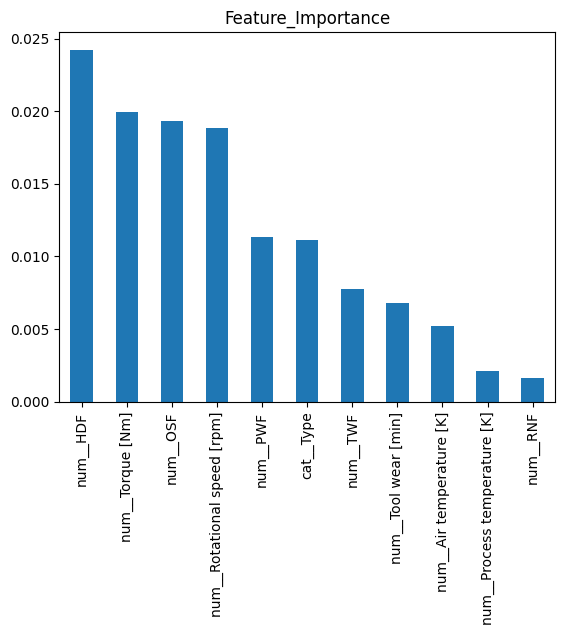

In [19]:
# Plotting the graph 
mi.plot(kind='bar', title='Feature_Importance')

## Final Preprocessing Pipline 

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
num_pipe2 = Pipeline(steps= [('imputer', SimpleImputer(strategy='mean')), 
                        ('scalar', StandardScaler())])

cat_pipe2 = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('num', num_pipe2, con),('cat', cat_pipe2, cat)])


In [23]:

X_pre2 = pre2.fit_transform(X)
X_pre2

array([[ 0.3958803 , -0.24623038,  0.54541592, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30220363, -1.04035788,  2.05187289, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ...,  0.        ,
         1.        ,  0.        ],
       [-1.59097397, -1.32913151,  0.26430672, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
cols2 = pre2.get_feature_names_out()
cols2

array(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF',
       'num__OSF', 'num__RNF', 'cat__Type_H', 'cat__Type_L',
       'cat__Type_M'], dtype=object)

In [26]:
X_pre2 = pd.DataFrame(X_pre2, columns=cols2)

In [27]:
X_pre2 

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127386,1.053251,0.069693,-0.335048,1.650769,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
136425,-1.268781,-1.040358,-0.528565,1.029305,-1.601020,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0,0.0
136426,0.342182,1.342025,0.026445,-0.217431,1.713303,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
136427,0.986567,0.692284,-0.528565,0.699979,-0.975676,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0


# Test Train Split 

In [29]:
from sklearn.model_selection import train_test_split
xtrain , xtest, ytrain , ytest = train_test_split(X_pre2, Y, test_size=0.2, random_state=42)

# Algo Evalution 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [32]:
dct = {'Logisitc' : LogisticRegression(),
       'Decision Tree' : DecisionTreeClassifier(),
       'RandomForest': RandomForestClassifier(),
       'Gradient Boosting' : GradientBoostingClassifier(),
       'SVC' : SVC()}

In [39]:
dct.items()

dict_items([('Logisitc', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('RandomForest', RandomForestClassifier()), ('Gradient Boosting', GradientBoostingClassifier()), ('SVC', SVC())])

In [41]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

tr = []
ts = []
tr_cv = []

for name, model in dct.items():
    model.fit(xtrain, ytrain)
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)

    tr_f1 = f1_score(ytrain, ypred_tr)
    ts_f1 = f1_score(ytest, ypred_ts)

    tr.append(tr_f1)
    ts.append(ts_f1)

    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1')
    f1_cv = scores.mean()
    tr_cv.append(f1_cv)




In [42]:
list(dct.keys())

['Logisitc', 'Decision Tree', 'RandomForest', 'Gradient Boosting', 'SVC']

In [43]:
eval_dct = {'Model':list(dct.keys()),
            'Train_f1':tr,
            'Test_f1':ts,
            'Train_CV':tr_cv}

In [44]:
eval_df = pd.DataFrame(eval_dct)
eval_df

,Model,Train_f1,Test_f1,Train_CV
0,Logisitc,0.862525,0.864865,0.862230
1,Decision Tree,0.995007,0.760626,0.743108
2,RandomForest,0.995016,0.864103,0.856482
3,Gradient Boosting,0.873239,0.863694,0.857937
4,SVC,0.862810,0.864865,0.862128


In [45]:
eval_df.sort_values(by='Test_f1', ascending=False)

,Model,Train_f1,Test_f1,Train_CV
0,Logisitc,0.862525,0.864865,0.862230
4,SVC,0.862810,0.864865,0.862128
2,RandomForest,0.995016,0.864103,0.856482
3,Gradient Boosting,0.873239,0.863694,0.857937
1,Decision Tree,0.995007,0.760626,0.743108


# Hyper Tunning of Logistic Model 

In [46]:
params =  {'C':[0.01, 0.1, 10, 50, 100, 1000]}

In [47]:
from sklearn.model_selection import RandomizedSearchCV
lr = LogisticRegression()
rscv = RandomizedSearchCV(lr, param_distributions=params, cv=5, scoring='f1')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.1, 10, 50, 100, 1000]},
                   scoring='f1')

In [48]:
rscv.best_params_

{'C': 0.1}

In [49]:
best_lr = rscv.best_estimator_
best_lr

LogisticRegression(C=0.1)

# Checking Accuracy in Training and Testing 

In [50]:
best_lr.score(xtrain, ytrain)

0.9961976489559569

In [51]:
best_lr.score(xtest, ytest)

0.9961518727552591

# Predication of Train and Test Value 

In [52]:
ypred_tr = best_lr.predict(xtrain)
ypred_ts = best_lr.predict(xtest)

In [53]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [54]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [55]:
ypred_ts[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [57]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


# Confusion Matix  

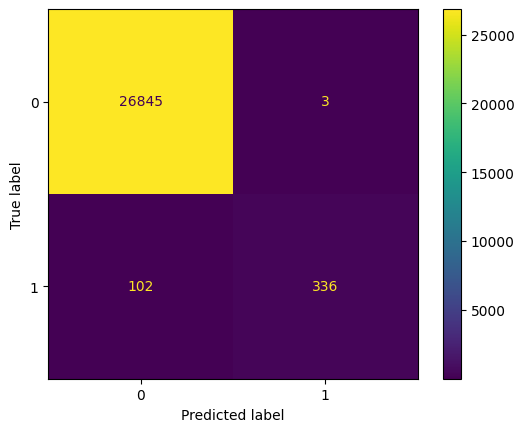

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_lr.classes_)
cfd.plot()

# Print Classification Report 

In [59]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



# Plotting ROC AUC Curve for Testing

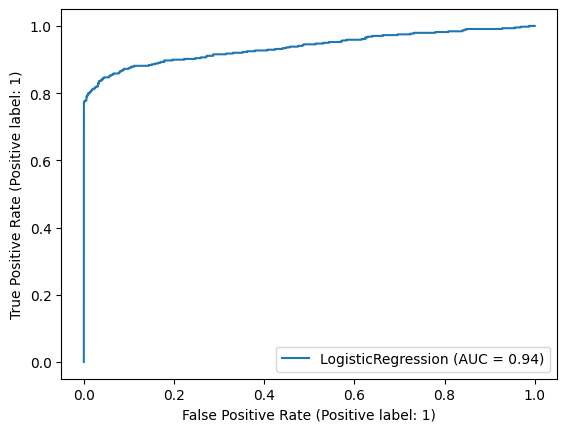

In [61]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(best_lr, xtest, ytest)

# Plottong the ROC AUC Curve for Training 

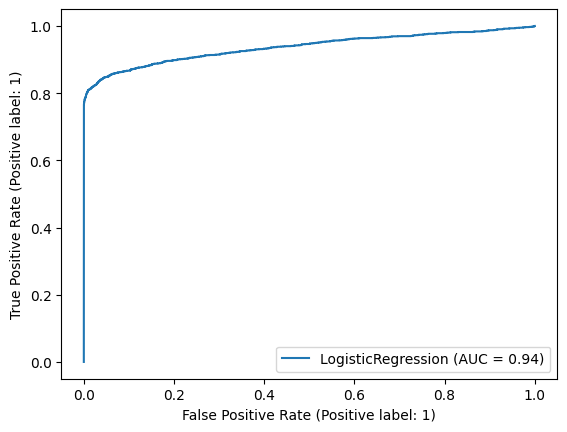

In [62]:
RocCurveDisplay.from_estimator(best_lr, xtrain, ytrain)

# Calculating the Area Under the Curve 

In [63]:
yprob_ts = best_lr.predict_proba(xtest)[:,1]
yprob_ts

array([0.9936134 , 0.00229177, 0.00240948, ..., 0.00166598, 0.01041991,
       0.00154054])

In [64]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_ts)

0.936784998993148

In [65]:
scores = cross_val_score(best_lr, xtrain, ytrain, scoring='roc_auc')
scores.mean()

0.9355732011428828

# Prediciting the Test Data 

In [66]:
xnew = pd.read_csv('test.csv')
xnew

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,227378,L51130,L,302.3,311.4,1484,40.4,15,0,0,0,0,0
90950,227379,L47783,L,297.9,309.8,1542,33.8,31,0,0,0,0,0
90951,227380,L48097,L,295.6,306.2,1501,41.4,187,0,0,0,0,0
90952,227381,L48969,L,298.1,307.8,1534,40.3,69,0,0,0,0,0


In [68]:
xnew.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [71]:
xnew_pre = pre2.transform(xnew)
xnew_pre

array([[ 1.30875929,  1.12544438, -0.15375311, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.98656671,  0.76447734,  1.3887435 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77177165,  0.33131689,  0.03365302, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-2.2890579 , -2.70080627, -0.13933725, ...,  0.        ,
         1.        ,  0.        ],
       [-0.9465888 , -1.54571174,  0.09852438, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.95314446,  2.06395869,  0.09852438, ...,  0.        ,
         1.        ,  0.        ]])

In [72]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols2)
xnew_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_H,cat__Type_L,cat__Type_M
0,1.308759,1.125444,-0.153753,-0.276240,-0.694271,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
1,0.986567,0.764477,1.388744,-1.358313,-1.366516,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
2,0.771772,0.331317,0.033653,-0.311525,-0.131461,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0,0.0
3,0.127386,-0.246230,-0.297912,0.852880,-1.554119,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0
4,1.899446,1.702992,-0.038426,0.111895,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,0.0,1.0


In [73]:
preds = best_lr.predict(xnew_pre)
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [74]:
probs = best_lr.predict_proba(xnew_pre)[:,1]
probs

array([0.00222472, 0.001099  , 0.00270896, ..., 0.00306237, 0.00240547,
       0.00241205])

# Creat Final Dataframe 

In [75]:
df_final = xnew[['id']]
df_final.head()

,id
0,136429
1,136430
2,136431
3,136432
4,136433


In [76]:
df_final['Machine Failed or not'] = preds
df_final['Machine Failure _prob'] = probs

In [78]:
df_final

,id,Machine Failed or not,Machine Failure _prob
0,136429,0,0.002225
1,136430,0,0.001099
2,136431,0,0.002709
3,136432,0,0.003088
4,136433,0,0.003862
...,...,...,...
90949,227378,0,0.002335
90950,227379,0,0.000514
90951,227380,0,0.003062
90952,227381,0,0.002405


<Axes: xlabel='Machine Failed or not'>

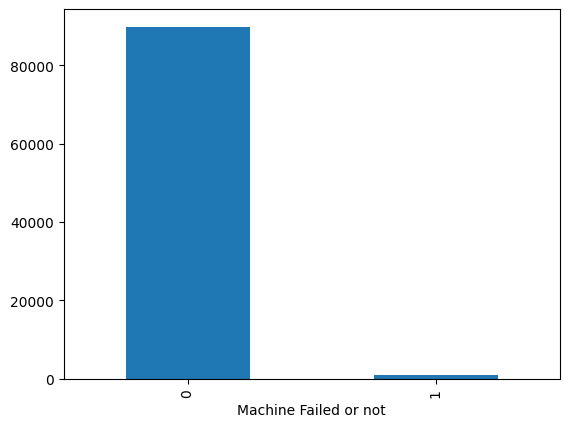

In [79]:
df_final['Machine Failed or not'].value_counts().plot(kind='bar')

In [81]:
df_final.to_csv('Project_Submission.csv', index=False)